<a href="https://colab.research.google.com/github/Mario-RJunior/Departamento-Marketing/blob/main/Segmentacao_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Importação das bibliotecas e da base de dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Criando o dataframe
link = 'https://raw.githubusercontent.com/Mario-RJunior/Departamento-Marketing/main/departamento-marketing.csv'
creditcard_df = pd.read_csv(link)
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_df.shape

(8950, 18)

Podemos ver que temos na nossa base de dados 8950 registros (clientes) e 18 colunas (atributos).

In [4]:
# Informações do dataframe
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Visualizando estatísticas
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Das estatísticas acima vemos que a maior compra a vista foi de $40761.25, o que é bastante alto. então, podemos encontrar este registro para tirar informações desta compra.

In [6]:
# Encontrando o cliente da maior compra a vista
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == creditcard_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Podemos ver que este é um cliente que compra com uma certa frequência e que sua única compra a vista consumiu quase o total de suas compras. Vemos ainda que ele não faz tantas compras parceladas em comparação com esta compra a vista e que também não retirar tanto dinheiro do cartão de crédito. Por fim, ainda notamos que este cliente tem apenas 25% de pagamento completo das faturas, o que pode significar que ele pode estar com dívidas e com dificuldade de pagamento das mesmas.

Um outro cliente que pode ser investigado no momento é aquele que realizou o maior saque a vista do limite do cartão de crédito, referente a importância de $47137.21.

In [7]:
# Encontrando o cliente do maior saque a vista do cartão de crédito
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Este cliente também compra com certa frequência mais ainda assim muito menos do que o cliente anterior. Ele ainda tem uma frequência maior para sacar dinheiro do cartão de crédito, chegando a fazer 123 saques. Por fim, ainda é possível notar que ele tem um percentual de 0% em pagamento completo da fatura, o que pode ser explicado pelo baixo índice de compras no cartão.  

## Pré-processamento dos dados


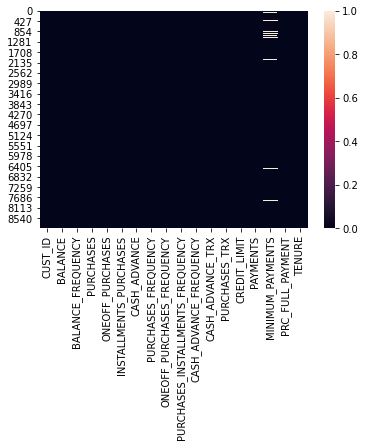

In [8]:
# Procurando valores nulos
sns.heatmap(creditcard_df.isnull());

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vemos que nesta base encontramos alguns valores nulos que precisamos tratá-los. Combinando este heatmap com o resultado acima concluímos que existe 1 valor faltante na coluna "CREDIT_LIMIT" e 313 valores faltantes na coluna "MINIMUM_PAYMENTS". 

Para tratar estes valores, iremos preenchê-los com a média de sua respectiva coluna.

In [10]:
# Preenchendo o valor faltante na coluna "PAYMENTS"
creditcard_df.fillna(creditcard_df['PAYMENTS'].mean(), inplace=True)

# Preenchendo os valores faltantes na coluna "MINIMUM_PAYMENTS"
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Verificando o resultado
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

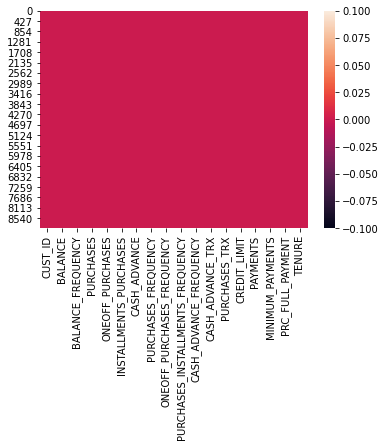

In [12]:
# Verificando os valores nulos pelo heatmap
sns.heatmap(creditcard_df.isnull());

In [13]:
# Verificando valores duplicados
creditcard_df.duplicated().sum()

0

Uma outra modificação que podemos fazer é excluir a coluna "CUST_ID" pois ela não irá gerar nenhum padrão para nosso modelo, o que torna-a dispensável.

In [14]:
# Excluindo a coluna "CUST_ID"
creditcard_df.drop(axis=1, columns='CUST_ID', inplace=True)

In [15]:
# Visualizando o cabeçalho
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1733.143852,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualização e exploração dos dados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

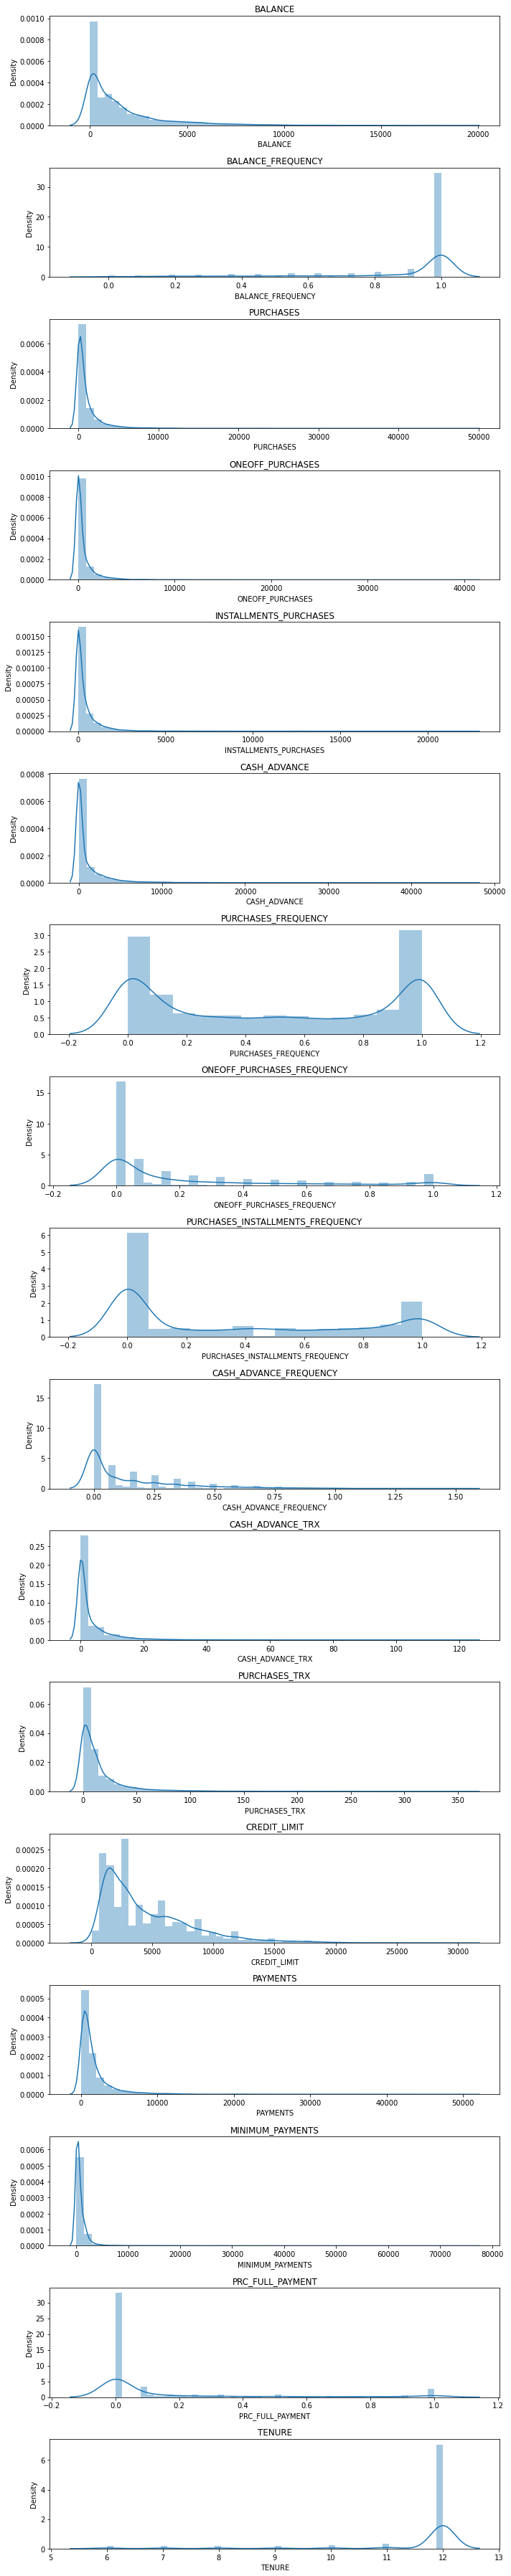

In [16]:
colunas = creditcard_df.columns
plt.figure(figsize=(10,50)) 

for i in range(0, len(colunas)):
  plt.subplot(len(colunas), 1, i + 1)
  sns.distplot(a=creditcard_df[colunas[i]], kde=True)
  plt.title(colunas[i])
plt.tight_layout();

Vendo os histogramas podemos fazer as seguintes interpretações:

- A grande maioria dos clientes mantém um salário na conta com saldo de aproximadamente $ \$2000$. Acima de $ \$5000$ temos pouquíssimas pessoas com este saldo na conta.

- A grande maioria dos clientes atualizam a conta corrente com frequência.

- O valor das compras variam até aproximadamente $ \$5000$, com poucas transações com valores maiores ou igual a $ \$10000$.

- Os valores das compras a vista são maiores do que os das compras a prazo, com cerca de $ \$5000$ e $ \$2500$ respectivamente.

- Os saques diretamente do limite do cartão tem valores ligeiramente superiores em comparação com as compras a vista.

- Verificando a frequência de compras concluímos que há dois grandes grupos: uma grande quantidade de pessas que não fazem compras e uma grande quantidade de pessoas que compram muito. Estes grupos podem ser alvos de incentivos ou estudo mais detalhado.

- A frequência de compras a vista e a prazo apresentam-se maiores para aqueles clientes que não compram com tanta frequência.

- O empréstimo diretamente do limite do cartão segue frequência parecida, tendo a maior parte dos clientes não usando este recurso frequentemente.

- O número de transações também apresenta-se relativamente pequena, bem como a taxa de compras.

- A maioria dos clientes apresentam limite de crédito inferior a $ \$10000$.

- O pagamento das faturas ficam, em sua maior parte, por volta de $ \$5000$.

- A grande maioria dos clientes fazem o pagamento mínimo da fatura, pagando em torno de $ \$4000$.

- A maioria dos clientes tem em média 12 anos com a conta ativa neste banco.

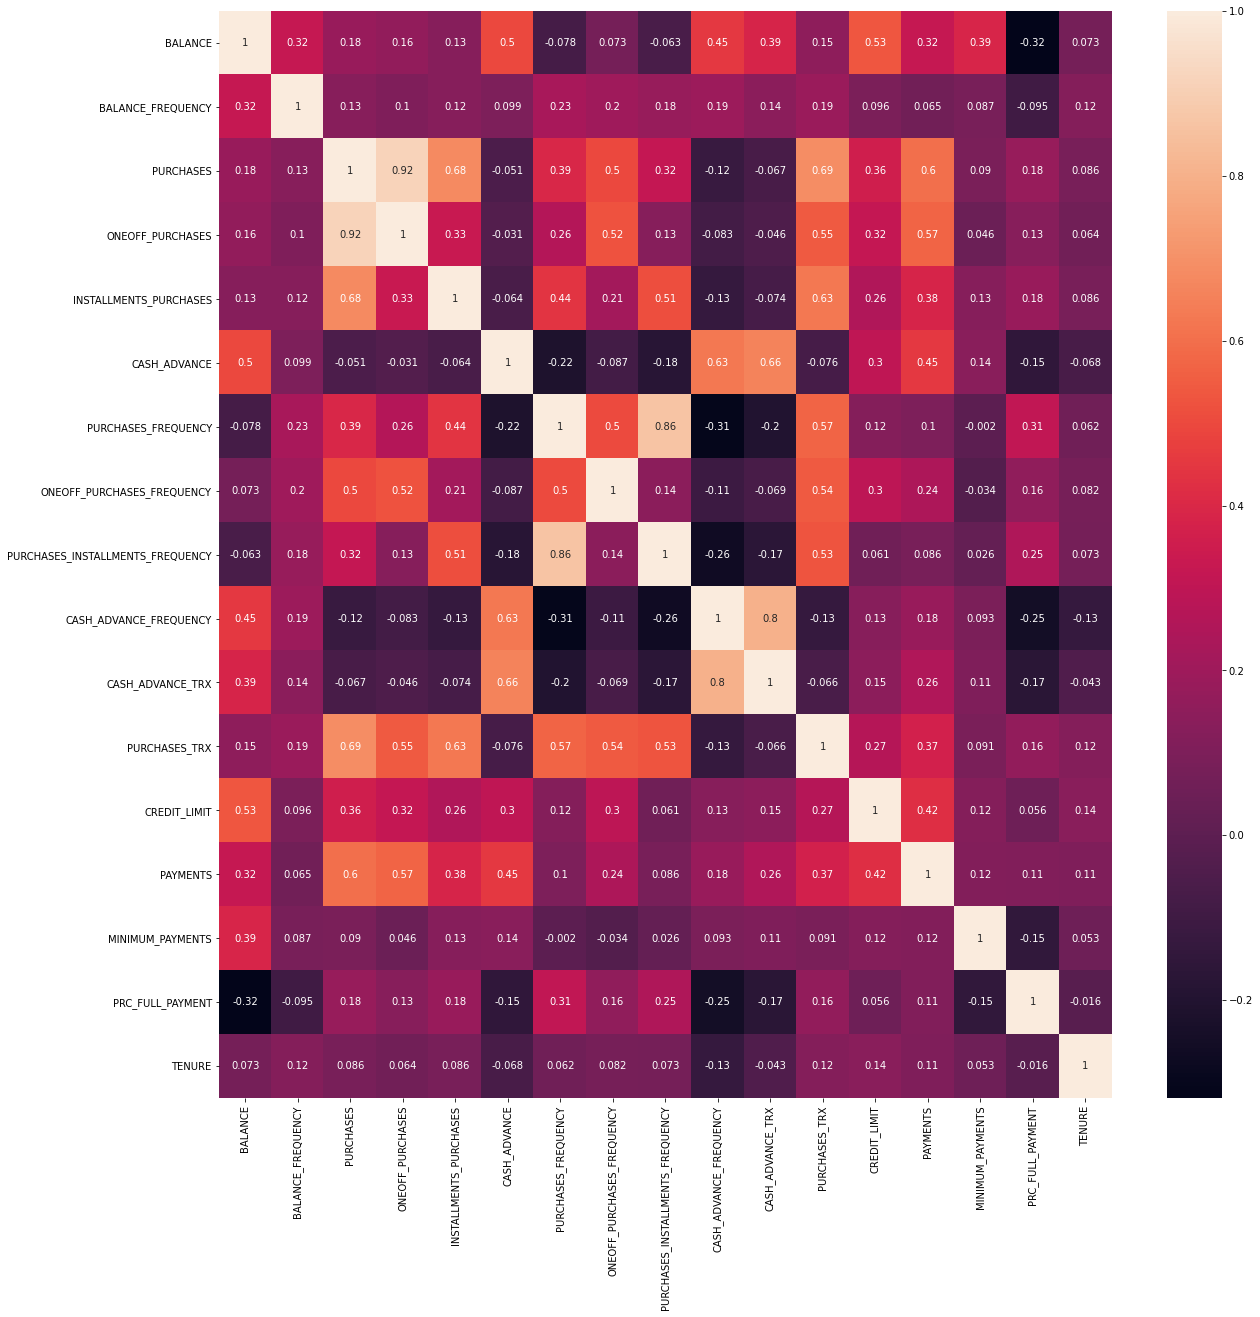

In [17]:
# Matriz de correlação
correlations = creditcard_df.corr()

# Heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando Elbow Method

Nosso intuito neste estudo de caso é agrupar os clientes do banco cujas características sejam semelhantes e para isso precisamos definir o melhor número de grupos para nossos dados. Para isso, botaremos em prática o *Elbow Method* para descobrir o número de clusters que mais se adequa aos dados.

Antes de usar este método precisamos escalonar os valores presentes no dataframe.

In [18]:
# Escalonando os dados
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.32324982,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.07609218,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.11443476,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.34769049,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.35910474,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.34517731,
        -0.52555097, -4.12276757]])

In [19]:
# Aplicando o Elbow Method
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss.append(kmeans.inertia_)
print(wcss)

[152150.00000000003, 127784.67781800359, 112007.81105584578, 99094.1037490473, 91523.13128202321, 84893.77783690745, 79565.58317298365, 74549.43634277336, 71260.75510108244, 66674.32109876201, 63698.319474198644, 61436.77258178238, 59207.51080270424, 57549.796871863466, 55980.55691738448, 54636.65932866938, 53381.84572494122, 52019.6069173755, 50438.2989771807]


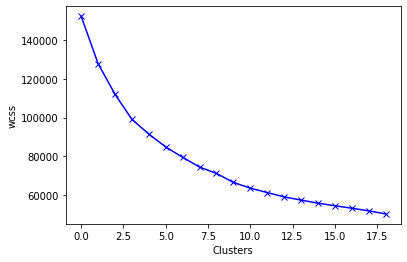

In [20]:
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('wcss');

A partir do gráfico acima notamos que um bom número de clusters que pode ser tomado é de 8 grupos.

## Agrupamento com K-Means

Após definido 8 clusters como ideal, faremos o agrupamento propriamente dito com o K-Means.

In [21]:
# Fazendo o treinamento
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [22]:
# Verificando os labels
labels, len(labels)

(array([5, 3, 7, ..., 6, 6, 6], dtype=int32), 8950)

In [23]:
# Verificando a quantidade de clientes por grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1181, 2024,  427,  851,   30, 2728,  622, 1087]))

In [24]:
# Verificando as coordenadas (médias) dos centroides
kmeans.cluster_centers_

array([[-7.01369262e-01, -2.14346584e+00, -3.12479447e-01,
        -2.37548386e-01, -3.02319911e-01, -3.21904751e-01,
        -5.56586288e-01, -4.44988773e-01, -4.39374353e-01,
        -5.20843751e-01, -3.76102518e-01, -4.19824059e-01,
        -1.80075436e-01, -2.03586250e-01, -2.11724397e-01,
         2.78784740e-01,  1.99199458e-01],
       [-3.63260886e-01,  3.34441303e-01, -3.69231504e-02,
        -2.43706963e-01,  3.60237326e-01, -3.63179636e-01,
         9.88770695e-01, -3.85664709e-01,  1.20457719e+00,
        -4.75312625e-01, -3.60825801e-01,  1.87852373e-01,
        -2.58972234e-01, -2.15428450e-01, -4.32928912e-02,
         3.09606634e-01,  2.58363277e-01],
       [ 8.96745485e-01,  4.67818305e-01,  2.25752977e+00,
         1.75160025e+00,  2.11995020e+00, -1.94549306e-01,
         1.16043990e+00,  1.59383012e+00,  1.22349306e+00,
        -3.06471903e-01, -2.11282823e-01,  2.75975321e+00,
         1.23591404e+00,  1.27396297e+00,  4.22807835e-01,
         2.91983699e-01,  3.3

Para melhor visualização das coordenadas dos centróides iremos criar um dataframe.

In [25]:
# Dataframe dos centróides
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701369,-2.143466,-0.312479,-0.237548,-0.302320,-0.321905,-0.556586,-0.444989,-0.439374,-0.520844,-0.376103,-0.419824,-0.180075,-0.203586,-0.211724,0.278785,0.199199
1,-0.363261,0.334441,-0.036923,-0.243707,0.360237,-0.363180,0.988771,-0.385665,1.204577,-0.475313,-0.360826,0.187852,-0.258972,-0.215428,-0.043293,0.309607,0.258363
2,0.896745,0.467818,2.257530,1.751600,2.119950,-0.194549,1.160440,1.593830,1.223493,-0.306472,-0.211283,2.759753,1.235914,1.273963,0.422808,0.291984,0.334613
3,1.704779,0.392678,-0.212148,-0.151837,-0.222739,2.038836,-0.464271,-0.203937,-0.402805,1.933480,1.957012,-0.258457,1.040710,0.835335,0.536420,-0.391424,0.069159
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044051,8.098975,1.104689,1.110132,0.310863
5,0.024596,0.403983,-0.362370,-0.247424,-0.402145,-0.082169,-0.869942,-0.412028,-0.760384,0.120300,-0.017332,-0.487655,-0.299766,-0.246157,-0.008447,-0.456507,0.271624
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.568276,-0.392680,-0.197743,0.014011,-3.203733
7,-0.174440,0.387739,0.446153,0.589142,-0.027584,-0.338381,0.938207,1.875963,0.075514,-0.413740,-0.327512,0.514251,0.366983,0.082721,-0.172947,0.418698,0.259627


Para uma melhor análise, podemos voltar aos valores originais (sem estarem escalonados) utilizandoa transformação inversa.

In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.633913,0.369503,335.587678,198.155703,137.683500,303.821813,0.266966,0.069709,0.189819,0.030918,0.682203,4.274576,3838.931733,1143.781606,400.024110,0.235254,11.783898
1,808.377957,0.956497,924.317954,187.933727,736.825788,217.266450,0.887192,0.087406,0.843167,0.040029,0.786456,19.379140,3551.863669,1109.499596,793.466404,0.244269,11.863075
2,3430.974861,0.988093,5826.451977,3499.735023,2328.112302,570.892130,0.956091,0.677928,0.850685,0.073816,1.806977,83.306977,8991.046512,5421.141815,1882.239780,0.239115,11.965116
3,5112.828605,0.970293,549.946616,340.418461,209.647626,5254.406029,0.304016,0.141619,0.204352,0.522053,16.603995,8.285546,8280.792650,4151.355447,2147.629222,0.039230,11.609871
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,1615.668644,0.972971,228.995189,181.763605,47.413058,806.559300,0.141201,0.079542,0.062241,0.159218,3.130546,2.588559,3403.434788,1020.543446,874.862443,0.020194,11.880821
6,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2426.452000,596.373827,432.683139,0.157813,7.229904
7,1201.392966,0.969122,1956.417295,1570.293211,386.124085,269.270100,0.866899,0.762094,0.394449,0.052351,1.013799,27.492180,5829.417914,1972.612744,490.606065,0.276176,11.864765


Agora que já temos as características dos grupos, podemos atribuir estas classificações a cada um dos clientes. Para isso, criaremos inicialmente um dataframe englobando todas estas características dos clientes.

In [27]:
# Criando um dataframe
creditcard_cluster_df = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcard_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1733.143852,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


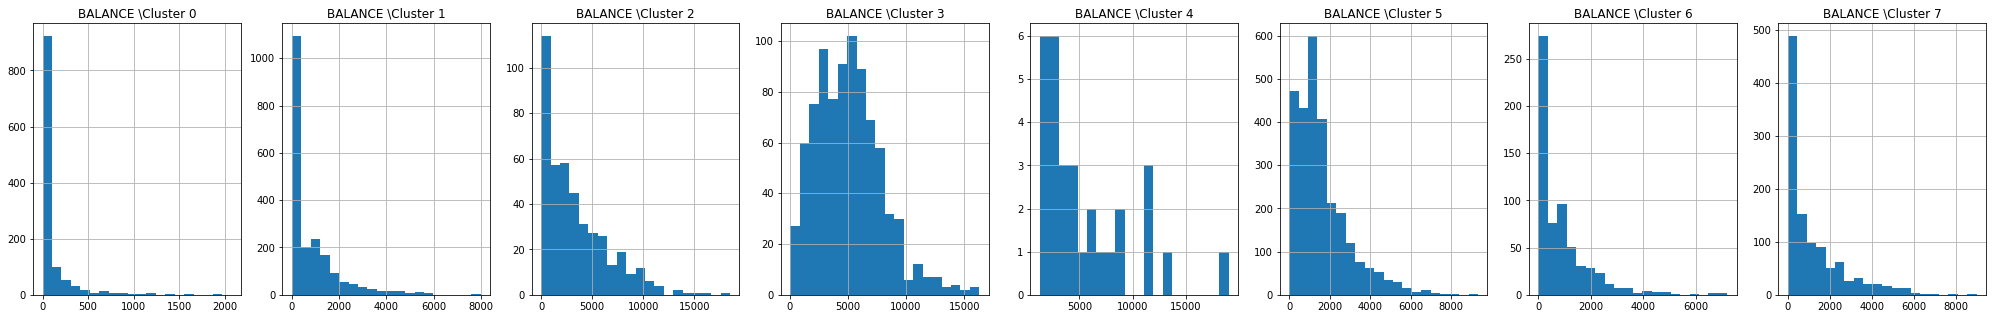

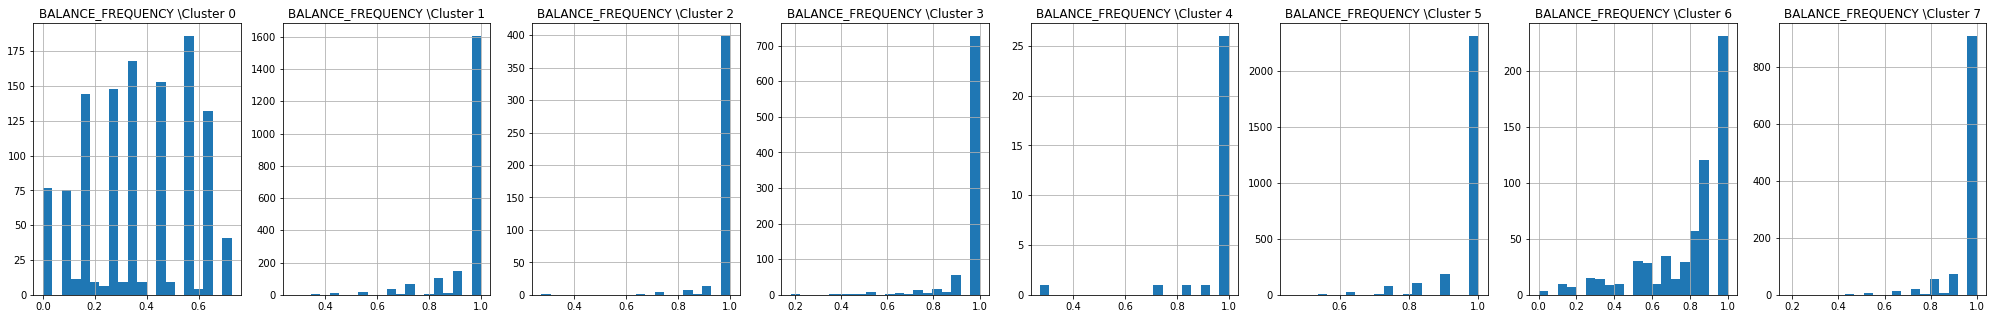

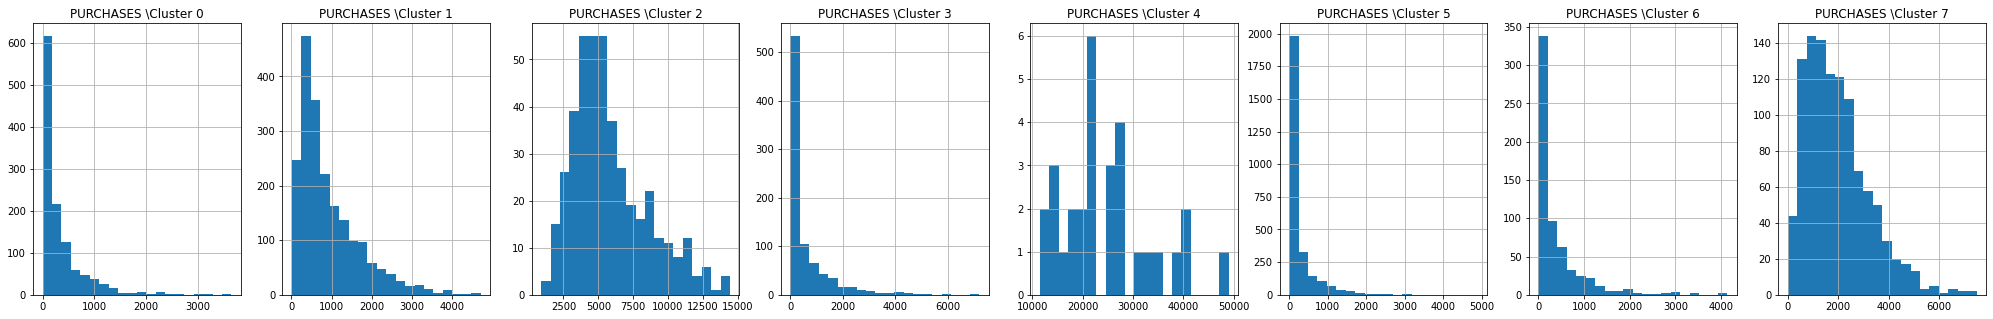

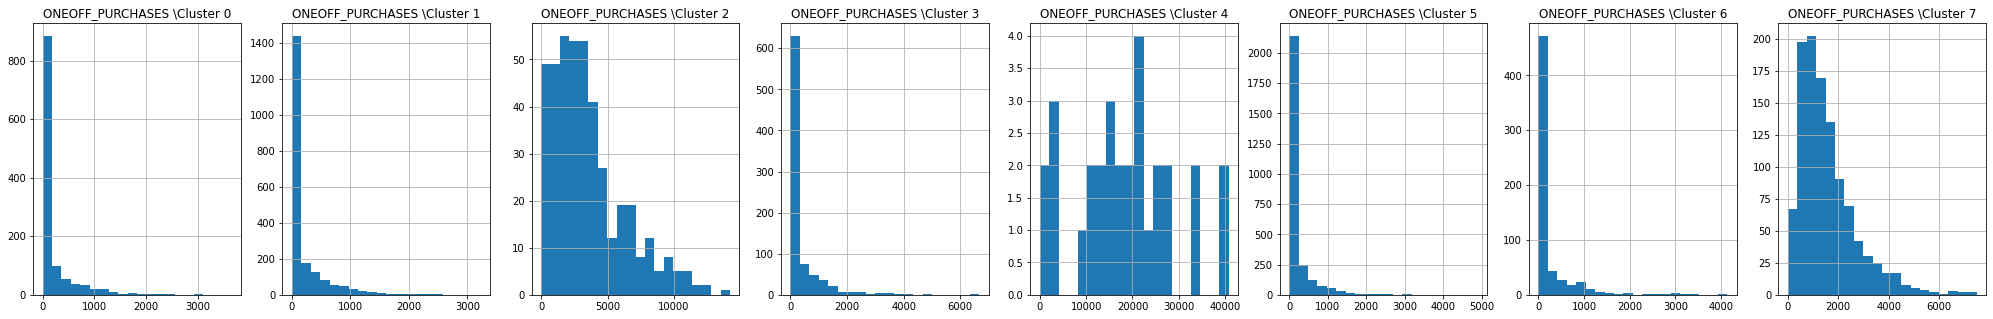

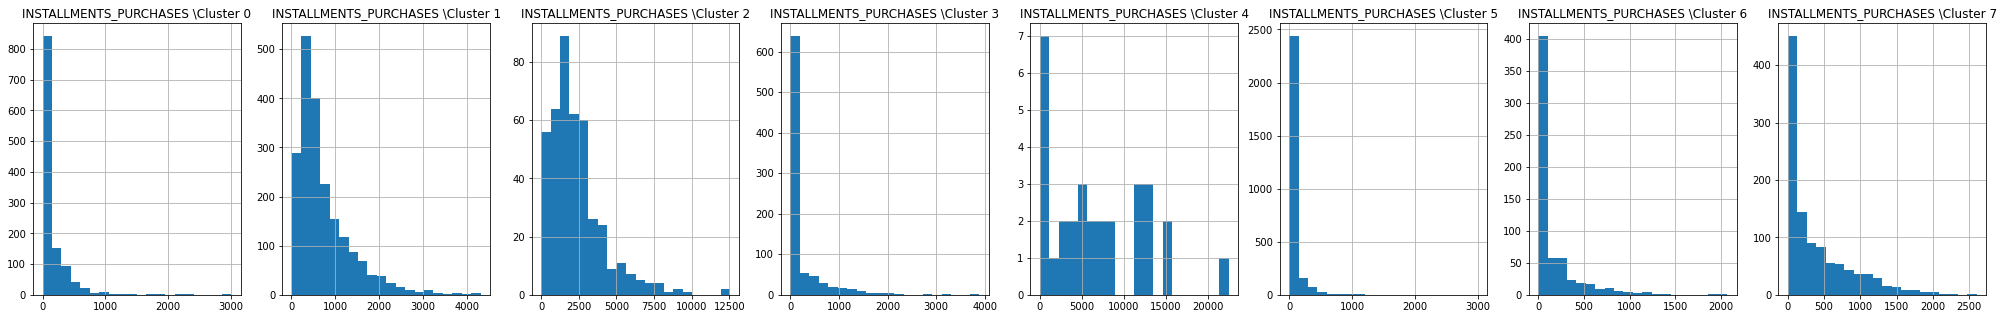

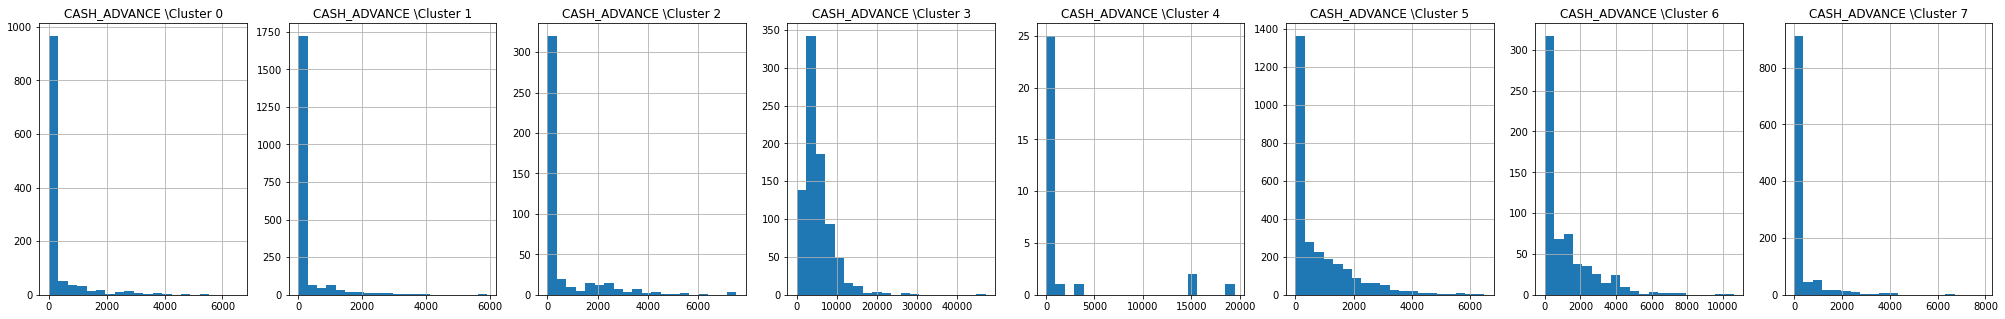

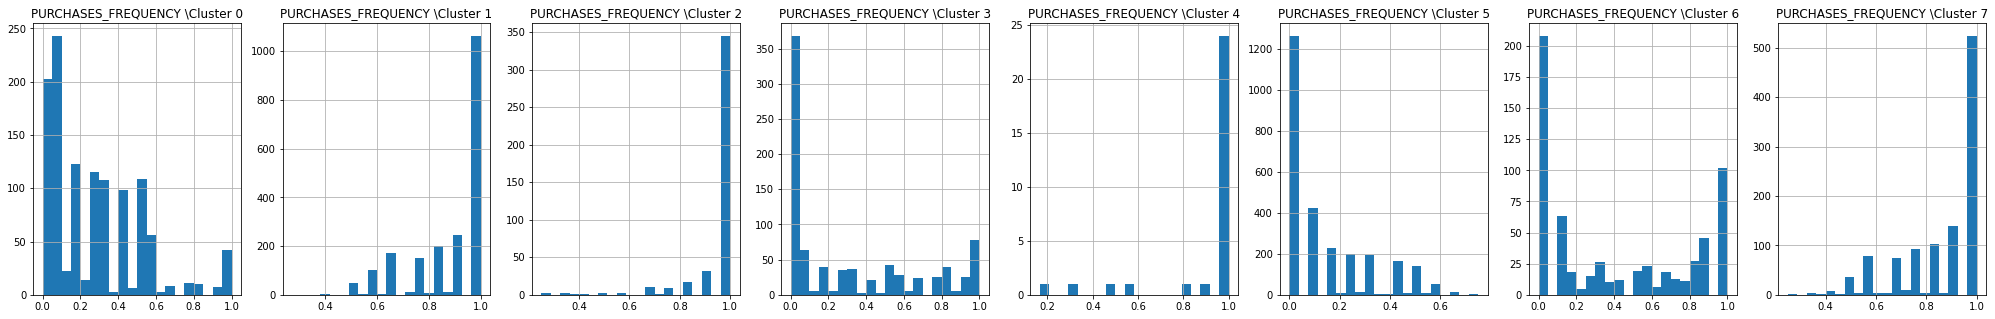

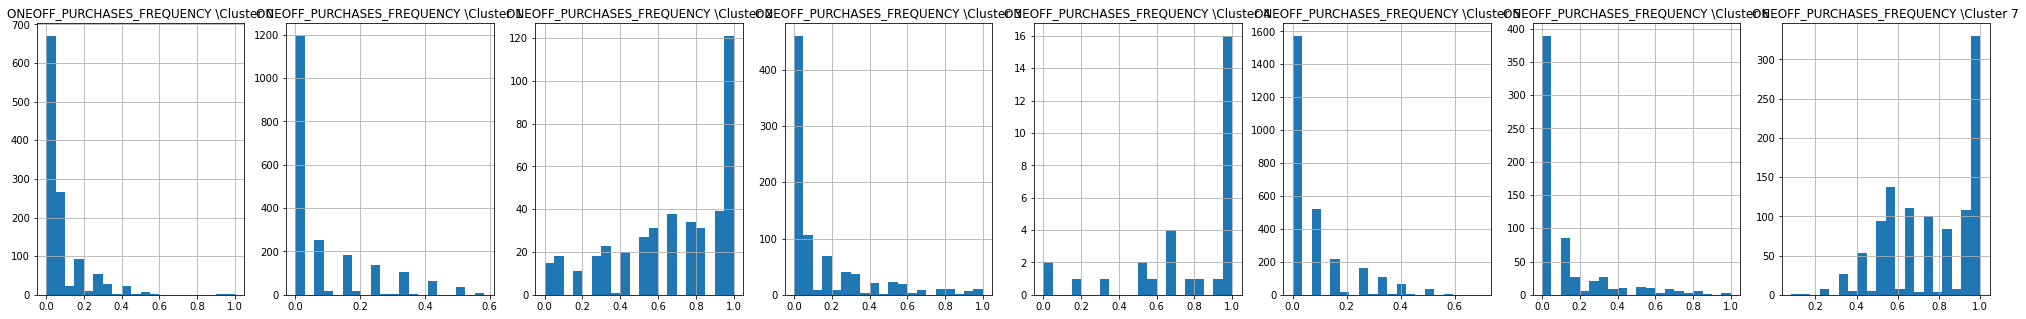

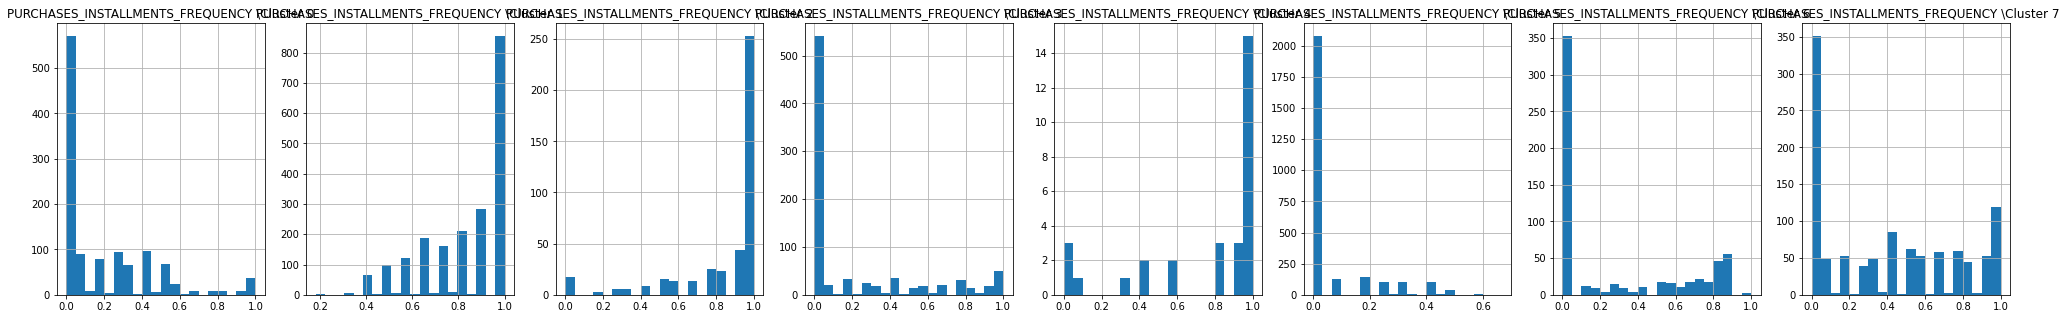

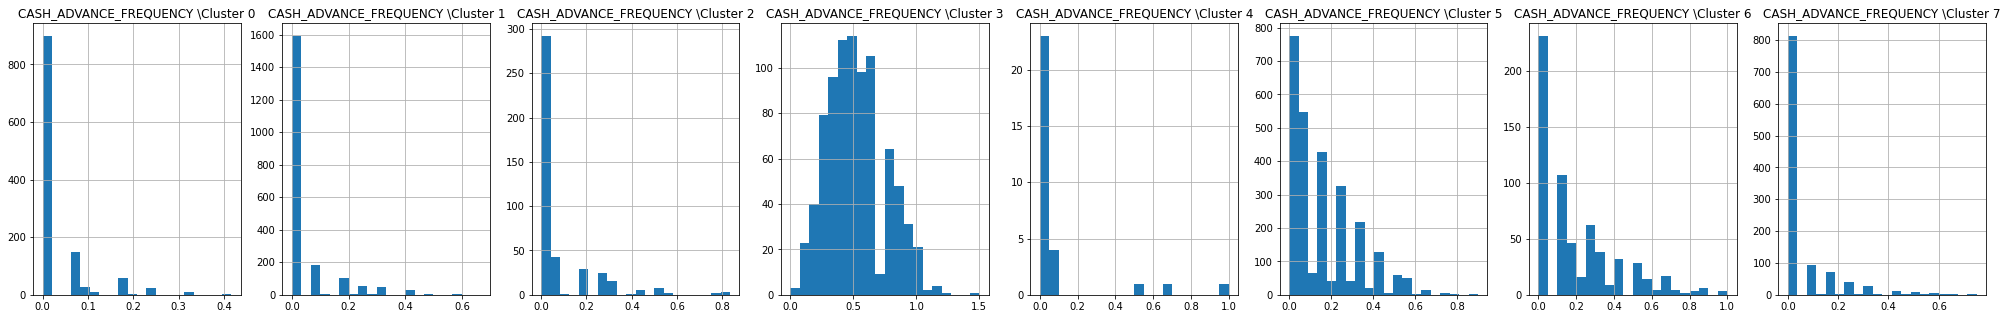

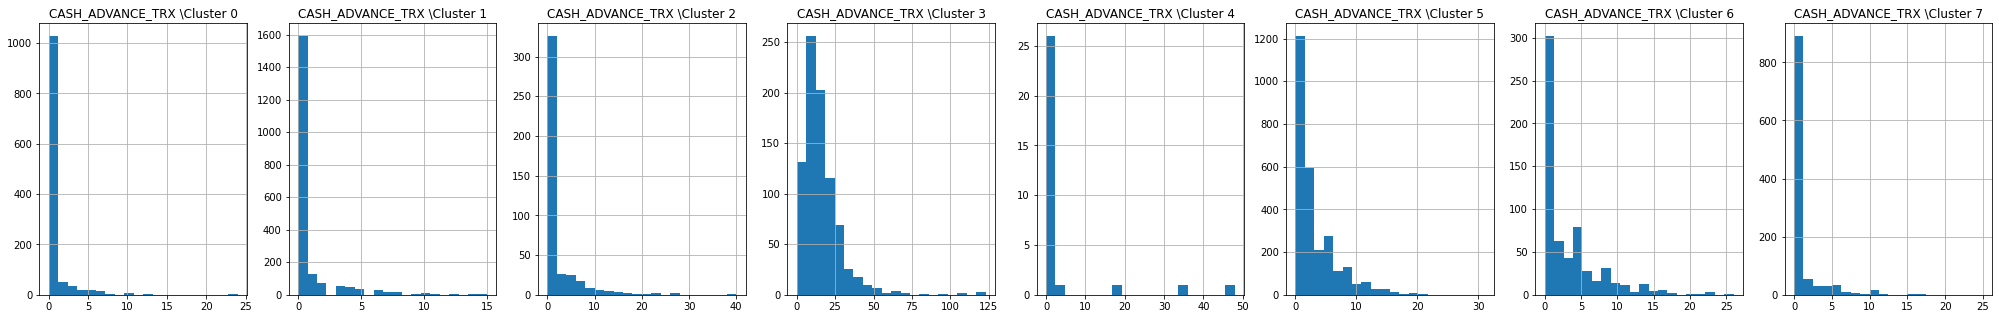

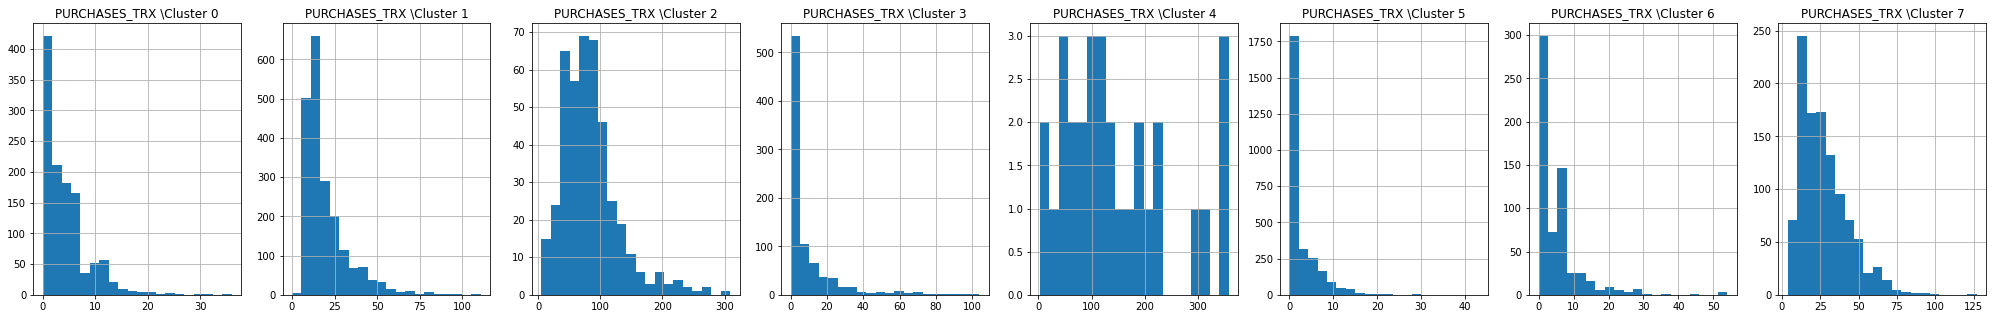

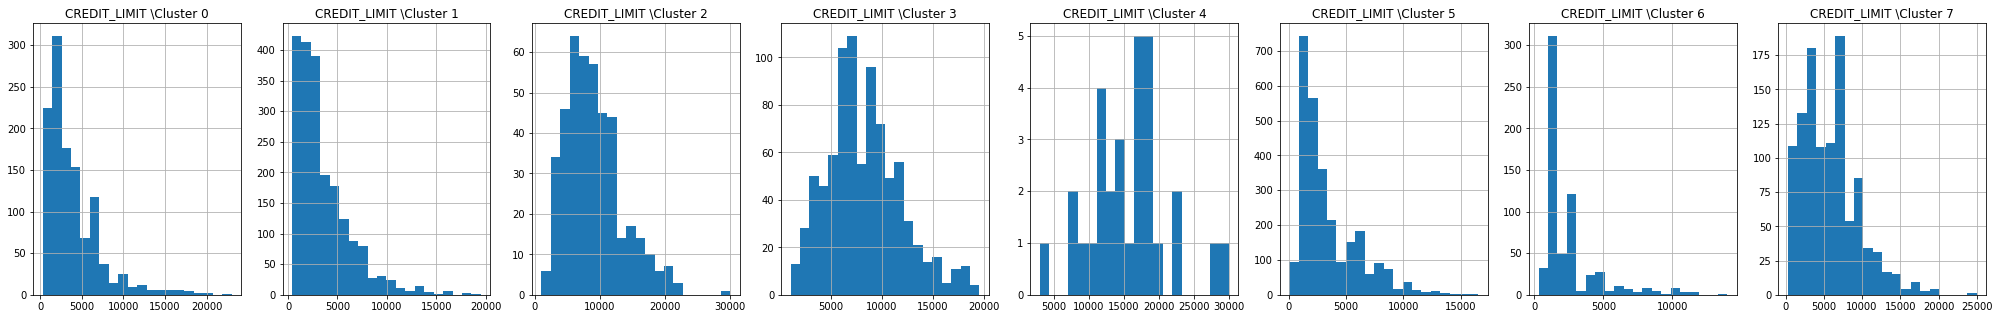

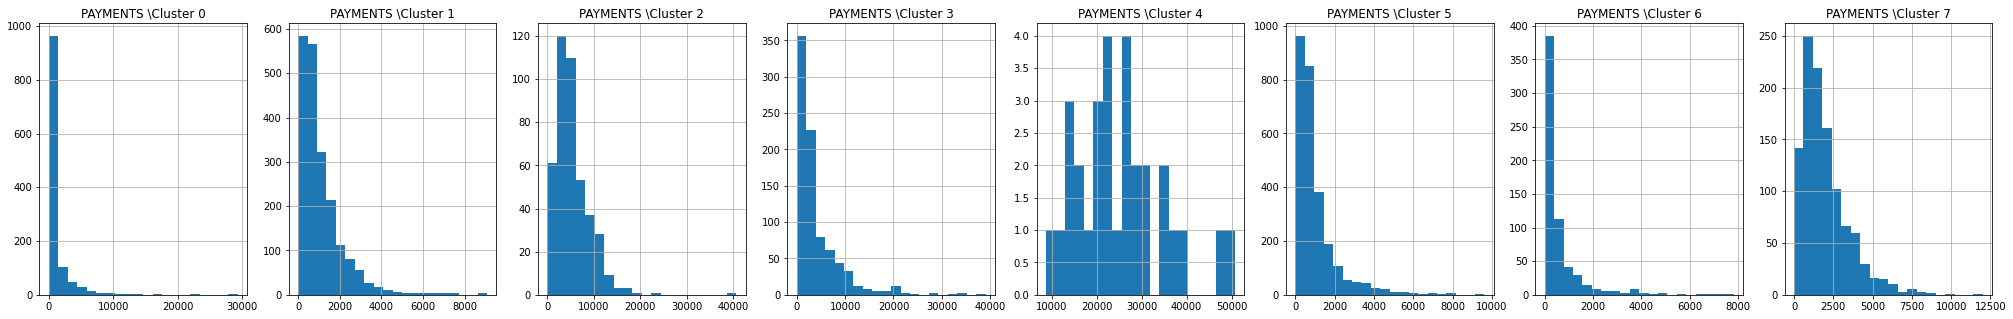

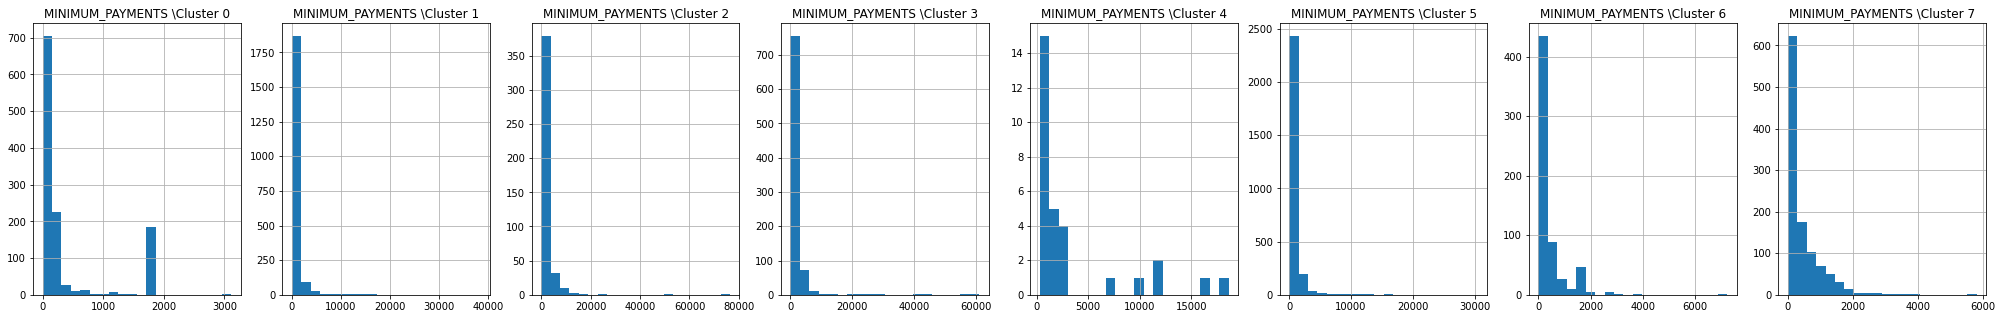

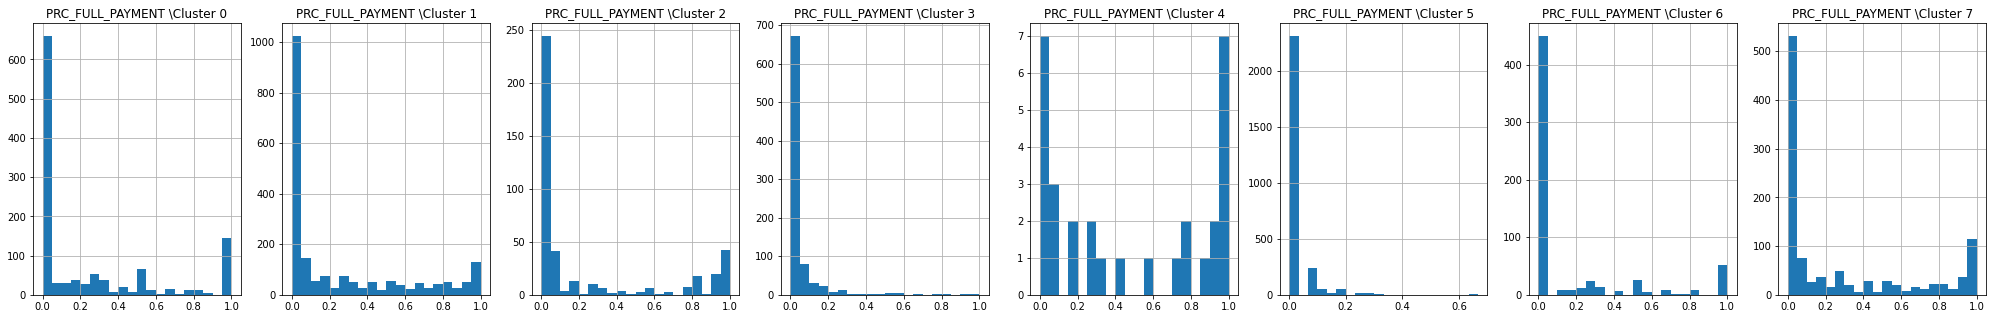

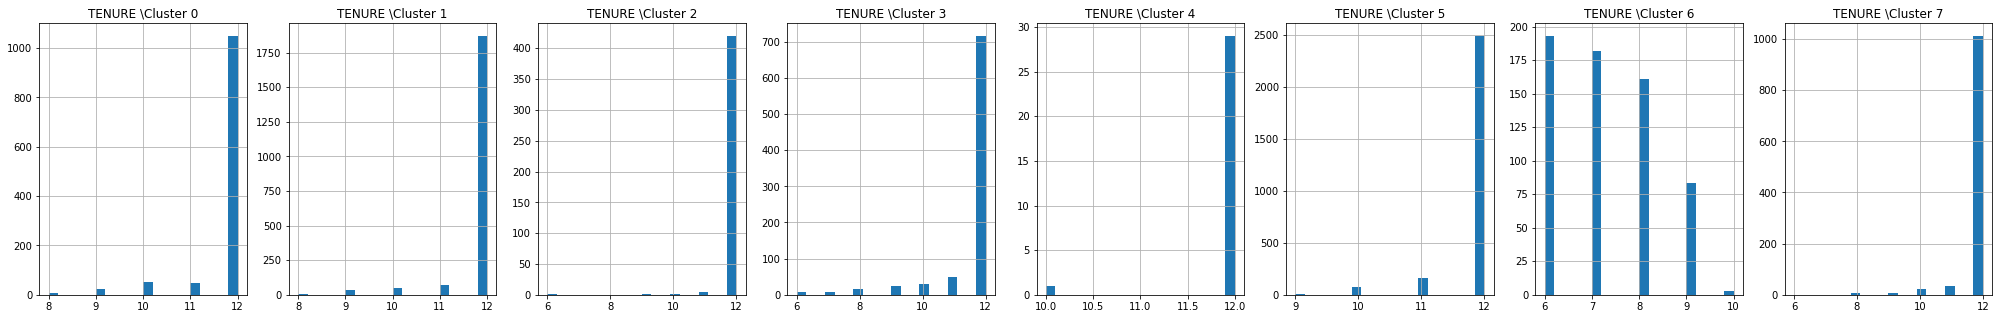

In [28]:
# Criando um histograma para os atributos por cluster
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j + 1)
    cluster = creditcard_cluster_df[creditcard_cluster_df['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \Cluster {}'.format(i, j))
  plt.show()

In [29]:
# Ordenando de forma crescente o dataframe por clusters
credit_ordered = creditcard_cluster_df.sort_values(by='cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5503,11.944853,0.181818,88.93,88.93,0.00,0.0,0.083333,0.083333,0.00,0.0,0,1,2750.0,430.507379,154.067397,0.000000,12,0
6605,38.342505,0.454545,134.28,134.28,0.00,0.0,0.083333,0.083333,0.00,0.0,0,3,6000.0,361.809474,73.633343,0.181818,12,0
8109,16.176672,0.363636,95.55,0.00,95.55,0.0,0.250000,0.000000,0.25,0.0,0,3,1000.0,136.961964,59.907285,0.000000,12,0
6597,25.725350,0.363636,150.48,0.00,150.48,0.0,0.250000,0.000000,0.25,0.0,0,3,2500.0,558.523870,200.779950,0.000000,12,0
3787,0.000199,0.090909,0.01,0.01,0.00,0.0,0.083333,0.083333,0.00,0.0,0,1,4000.0,0.056466,0.055880,0.000000,12,0


In [30]:
# Salvando em arquivo csv
credit_ordered.to_csv('cluster.csv')

## Aplicação do PCA (principal components analysis) e visualização dos dados

Iremos agora reduzir a dimensão deste dataset para de 18 para 2 para plotarmos em um gráfico.

In [31]:
# Criando o objeto da classe PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.67970539, -1.0827582 ],
       [-1.14478196,  2.50247193],
       [ 0.97042806, -0.38307498],
       ...,
       [-0.92168348, -1.81490593],
       [-2.33438135, -0.66454424],
       [-0.55385784, -0.39983431]])

In [32]:
# Criando o dataframe
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.679705,-1.082758
1,-1.144782,2.502472
2,0.970428,-0.383075
3,-0.853426,0.101465
4,-1.598224,-0.695773


In [33]:
# Concatenando com o dataframe original
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.679705,-1.082758,5
1,-1.144782,2.502472,3
2,0.970428,-0.383075,7
3,-0.853426,0.101465,5
4,-1.598224,-0.695773,5


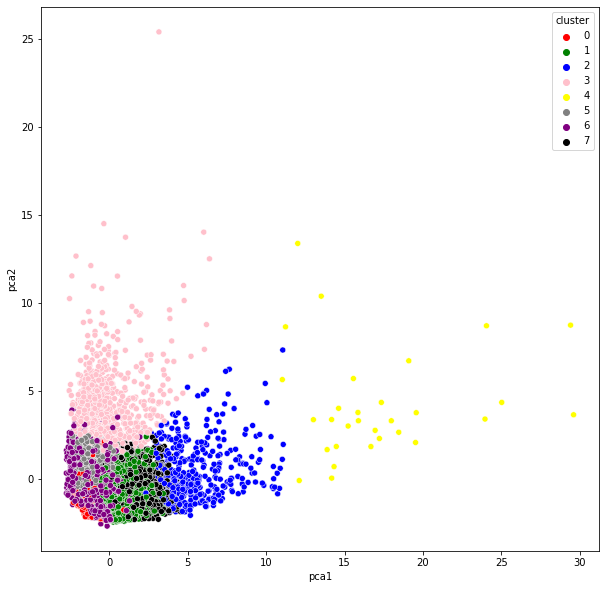

In [34]:
# Plotando o dataframe acima
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, 
                x='pca1', 
                y='pca2', 
                hue='cluster', 
                palette=['red', 'green', 'blue', 'pink', 
                         'yellow', 'gray', 'purple', 'black'])
plt.show()

Podemos agora, como uma alternativa ao PCA, fazer um autoencoder e assim fazer uma comparação com seus respectivos resultados.

## Aplicação de autoencoders

In [36]:
# Visualizando o shape do dataframe a ser utilizado
creditcard_df_scaled.shape

(8950, 17)

In [37]:
# Importando as bibliotecas
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

Iremos criar a seguinte estrutura:

- Começaremos com as 17 colunas originais;
- Iremos ligar a duas camadas para aumentar a dimensão: para 500 e depois para 2000;
- Chegaremos a camada codificada com 10 dimensões;
- Faremos enfim o processo inverso de decodificação.

In [38]:
# Criando objeto da classe Input com shape igual a 17 atributos
input_df = Input(shape=(17,))

# Ligando estes 17 neurônios a 500 e depois a 2000
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

# Camada codificada com 10 neurônios
encoded = Dense(10, activation='relu')(x)

# Decodificando
x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

# Camada já decodificada
decoded = Dense(17)(x)

In [39]:
# Criando o autoencoder
autoencoder = Model(input_df, decoded)

In [40]:
# Criando o encoder
encoder = Model(input_df, encoded)

In [41]:
# Compilando o autoencoder
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [43]:
# Treinando o autoencoder
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs=50)

Epoch 1/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0725
Epoch 2/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0572
Epoch 3/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0528
Epoch 4/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0533
Epoch 5/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0658
Epoch 6/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0543
Epoch 7/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0416
Epoch 8/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0436
Epoch 9/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0312
Epoch 10/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0281
Epoch 11/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0224
Epoch 12/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0290
Epoch 13/50
2

In [46]:
# Dados compactados
compact = encoder.predict(creditcard_df_scaled)

In [48]:
# Verificando o shape
compact.shape

(8950, 10)

Note que de fato reduzimos a dimensão da base de dados de 17 para 10.

In [49]:
# Verificando os dados originais
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96031765, -0.52897879, -0.32324982,
       -0.52555097,  0.36067954])

In [50]:
# Verificando o resultado após a compactação
compact[0]

array([0.        , 0.14096048, 1.088206  , 0.6124334 , 0.35678124,
       0.9207519 , 0.5373189 , 0.        , 0.14568718, 0.35156602],
      dtype=float32)

Nestes dados compactados, iremos aplicar novamente o Elbow Method e a seguir o K-Means.

In [51]:
# Aplicando o Elbow Method
wcss_enc = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_enc.append(kmeans.inertia_)
print(wcss_enc)

[76343.03, 58087.62427620393, 47763.80407172984, 42707.33867045254, 38728.95441262604, 35517.36030819929, 33282.32933315724, 31600.53467107047, 30204.769900087267, 29019.99864814039, 28049.7641203158, 26919.998828123644, 26180.957648952743, 25362.703458716074, 24675.274683483905, 24095.101157483212, 23396.172071189158, 22873.107729413598, 22349.471765514787]


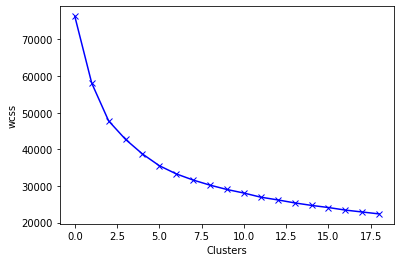

In [52]:
# Plotando o gráfico
plt.plot(wcss_enc, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('wcss');

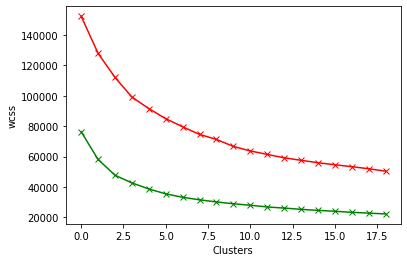

In [54]:
# Plotando os dois gráficos para comparação
plt.plot(wcss, 'bx-', c='r')
plt.plot(wcss_enc, 'bx-', c='g')
plt.xlabel('Clusters')
plt.ylabel('wcss');

Vemos que um bom número de clusters é em torno de 4 ou 5. Tomaremos, neste caso, igual a 4.

In [55]:
# Fazendo o treinamento com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [56]:
# Criando os labels
labels = kmeans.labels_
labels, labels.shape

(array([1, 0, 1, ..., 0, 0, 0], dtype=int32), (8950,))

In [58]:
# Criando dataframe do autoencoder
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1733.143852,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
